# Введение в ООП

## Проблемы процедурного подхода

Написание программы в процедурном стиле в определенный момент приводит к ряду трудноразрешимых проблем.

Предположим, в программе необходимо реализовать работу с некоторым числом окружностей. Минимальные данные, необходимые для создания отдельной окружности, - это координаты ее центра x и y, а также радиус r.

Одним из простых решений является выбор какой-либо структуры данных, например, списка:


In [2]:
circle = [-2, 3, 10]  # 'x', 'y' и 'r'

Данное решение имеет 3 недостатка:

1. Неочевидность назначения каждого элемента списка.

    Разработчик может подразумевать [x, у, r] или [r, x, y], кроме того, для обращения к параметру окружности необходимо точно знать его индекс.

    «Сгладить» данную проблему могут помочь именованые константы или использование словаря

In [3]:
# Использование именованых констант для доступа к свойствам окружности

import math

C_X = 0
C_Y = 1
C_R = 2


def get_s(circle):
    """Вернуть площадь окружности 'circle'."""
    return math.pi**2 * circle[C_R]

circle = [-2, 3, 10]

print("{:.2f}".format(get_s(circle)))  # 98.70

98.70


In [4]:
# Словарь как структура данных для окружности

import math
def get_s(circle):
    """Вернуть площадь окружности 'circle'."""
    return math.pi**2 * circle['r']

circle = dict(x=36, y=77, r=8)

print("{:.2f}".format(get_s(circle)))  # 78.96

78.96


2. Отсутствие контроля за значениями.

    Даже ликвидация первого недостатка не помешает выполнить, например,

    circle['r'] = -5
    чего не должно быть в принципе.

    Такая невозможность выполнить встроенную проверку данных является, возможно, самым негативным аспектом исключительно процедурного подхода.

3. Малая эффективность использования существующего кода.

    Третья проблема возникает в случае, когда встает необходимость одновременно работать не только с окружностями, но и с другими геометрическими фигурами (в т.ч. одним и тем же образом).

    Например, для кольца или эллипса, понадобится создать новую структуру данных со схожими характеристиками, во многом дублирующими функциональность окружности (нарисовать себя на экране, передвинуться в точку и т.д.), хотя некоторый код мог бы быть использован повторно.

Для комплексного решения указанных проблем необходим способ, который позволил бы:

- логически «упаковать» данные, предоставив удобный интерфейс доступа (не привязанный к конкретной структуре данных);

- ограничить круг данных и операций, которые могли бы быть изменены;

- повторно использовать написанный код при необходимости.

Это может быть достигнуто путем создания собственного объекта (типа данных) *Окружность*, используя объектно-ориентированный стиль программирования.

## Основные понятия и терминология

**Объект** - любой материальный предмет, который можно встретить в повседневной жизни: дом, телефон, машина, книга и т.д.

Применительно к программированию, объектом можно считать любое нечто, которое можно представить в программе в виде одного элемента, который имеет какие-либо характеристики и умеет что-либо делать. Это позволяет разделять программу (большую и не очень) на связанные, более мелкие элементы, логически взаимодействующие между собой так, как бы они взаимодействовали и в реальной жизни. Данная идея берет свое начало от концепции черного ящика

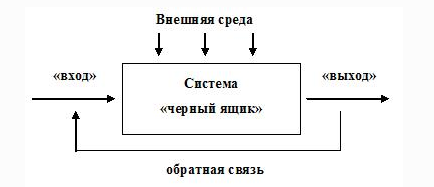

Черный ящик рассматривается как система, принимающая некую «входную информацию» (данные) и возвращающая «выходную информацию» (результаты работы), при этом происходящие в ходе работы системы процессы наблюдателю неизвестны.

В качестве примера такой системы можно рассмотреть планшетный компьютер. Не являясь специалистом, ответить на вопросы «что находится внутри?» или «как оно работает?» практически невозможно. При этом известно, что нажатие на определенные участки экрана («входная информация») позволит запустить приложение, установить будильник на завтрашнее утро и т.д. («выходная информация»). Более того, можно приобрести новый планшет, и, несмотря на то, что его «начинка» может существенно отличаться, скорее всего проблем с его использованием не возникнет, т.к. аналогичные функции являются стандартными для любых планшетов. Так концепция «черного ящика» разделяет понятия «что объект делает?» и «как он это делает?», предоставляя необходимый уровень детализации для изучения и использования объекта.

Цель объектно-ориентированного подхода - основываясь на модели черного ящика, разбить программу (декомпозировать) на достаточное количество классов и модулей, каждый из которых предназначен для выполнения одной четко очерченной задачи, которую будет выполнять отдельный объект.

Плюсы данного подхода заключаются в том, что декомпозиция позволяет:

- упростить архитектуру приложения (фактически, сделав ее абстракцией реального мира);

- облегчить командную разработку (каждый разработчик занят работой над отдельным объектом кода и при взаимодействии с другими объектами ему нужно знать лишь «что объект делает», без необходимости узнавать «как он это делает»).

**Объектно-ориентированное программирование (ООП)** - парадигма программирования, предусматривающая написание программ в рамках объектно-ориентированного подхода.

В **ООП** центральными являются понятия класса и объекта:

- **Класс** (англ. Class): абстракция реального мира (обобщенный шаблон), специальный тип данных; класс описывает свойства и методы, которые могут быть доступны у подобных объектов;

- **Объект** (англ. Object) (экземпляр класса, англ. Class Instance): частный случай класса.


Пример разницы между классом и объектом приведена на Рисунке

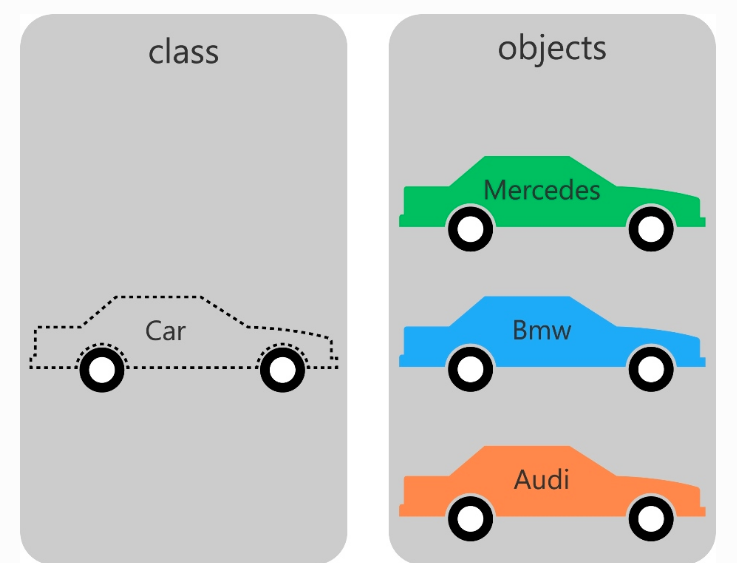

Каждый класс содержит и описывает поля и методы:

1. Поле (англ. Data Member / Variable / Field): переменная, привязанная к классу;

2. Метод (англ. Method): действие (функция), которую можно проводить над классом.

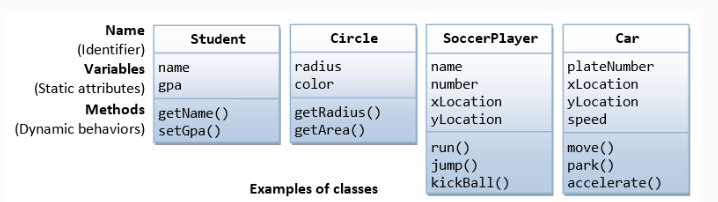

Набор полей и методов определяет интерфейс класса - способ взаимодействия с классом произвольного кода программы. Доступ к полям и методам осуществляется через указание объекта, например, в Python, используя точку:

In [5]:
"Я - экземпляр класса str".count(" ")  # 4

4

Типичный сценарий написания объектно-ориентированной программы:

Создание одного или нескольких классов (или поиск подходящих существующих).

Создание произвольного количества экземпляров классов (инстанцирование) - объектов.

Изменение полей и вызов методов созданных объектов.

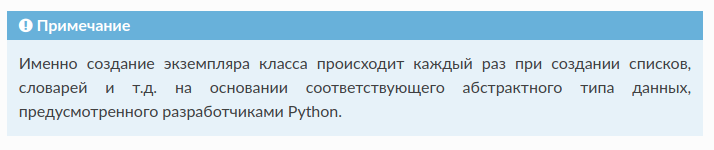

Как поля так и методы могут иметь разный уровень доступа - область видимости (англ. Scope)

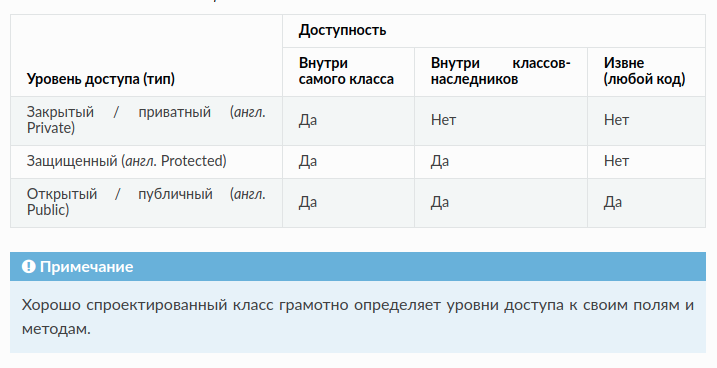

Еще одним понятием, относящимся к классу, является виртуальность метода. Если метод объявлен как виртуальный - он может быть переопределен (изменено поведение метода) в классах-наследниках.

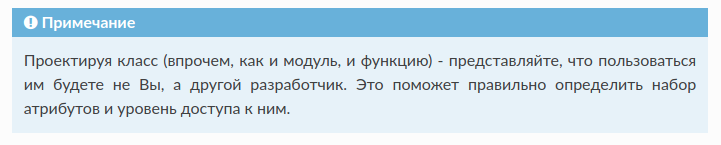

## Принципы ООП

Объектно-ориентированная парадигма программирования включает 3 основных принципа (свойства):

**Инкапсуляция** (англ. Encapsulation)

    Как язык скрывает детали внутренней реализации объектов и предохраняет целостность данных?

**Наследование** (англ. Inheritance)

    Как язык стимулирует многократное использование кода?

**Полиморфизм** (англ. Polymorphism)

    Как язык позволяет трактовать связанные объекты сходным образом?

**Наследование** ― концепция ООП, согласно которой конкретный класс может наследовать данные и функции от другого класса

**Инкапсуляция** ― это механизм языка, который позволяет объединять данные и методы, которые работают с этими данными, в один объект и скрывать детали реализации от пользователя.

**Полиморфизм** ― это способность объектов с одинаковой спецификацией иметь разные реализации

### 1. Инкапсуляция

За счет принципа инкапсуляции язык может скрывать некоторые детали реализации от пользователя объекта.

In [ ]:
# Этот класс инкапсулирует детали открытия и закрытия базы данных
db_reader = DatabaseReader()
db_reader.open("С:/Balance.sqlite")

# Сделать что-то с файлом данных...
avg_sales = db_reader.get_avg(table="Сотрудник", field="КоличествоПродаж")
# ...

# Закрыть файл
db_reader.close()

Класс DatabaseReader инкапсулирует внутренние детали нахождения, загрузки, манипуляций и закрытия файла данных. Нет необходимости беспокоиться о многочисленных строках кода, которые работают «за кулисами», чтобы использовать класс в своем приложении. Все, что потребуется — это создать экземпляр класса и отправить ему соответствующие сообщения (например, “открыть файл по имени Balance.sqlite, расположенный на диске С:\”).

Концепция инкапсуляции вращается вокруг принципа, гласящего, что внутренние данные объекта не должны быть напрямую доступны через экземпляр объекта. Вместо этого данные класса определяются как закрытые. Если вызывающий код желает изменить состояние объекта, то должен делать непрямо через открытые методы. Этот принцип переплетается с идеей защиты данных - «внешний мир» должен попросить о возможности изменения или получения лежащего в основе объекта значения.

### 2. Наследование

**Наследование** — аспект ООП, облегчающий повторное использование кода. Принцип наследования встречается в повседневной жизни - мы группируем объекты по какому-то признаку (форме, дизайну и т.д.).

Например:

диван похож на кресло, но позволяет уместить больше 1 человека;

оптический привод в компьютере выполняет запись информации на определенный носитель, как и кассетный проигрыватель;

каждый автомобиль имеет свои «внутренности», однако предоставляет общий интерфейс (руль, педали, определенная коробка передач), и нет необходимости изучать каждый автомобиль отдельно для того, чтобы им пользоваться.

Принцип наследования в языке программирования позволяет строить новые определения классов на основе существующих. Наследование позволяет расширять поведение базового класса (родительского или суперкласса), наследуя его основную функциональность в производном подклассе (дочернем классе или подклассе).

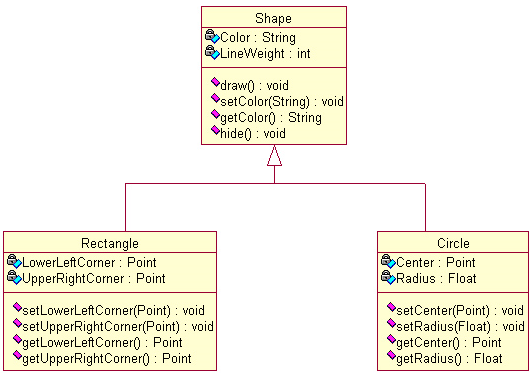

Прочесть диаграмму можно следующим образом:

- классы Прямоугольник (Rectangle) и Окружность (Circle) являются Фигурой (Shape) (дочерними классами);

- фигура (Shape) имеет следующие характеристики (и ими обладают все дочерние классы!): поля - цвет, толщина линии и методы - отрисовка(), очистка();

- дочерние классы имеют дополнительные характеристики (расширяя унаследованный класс Фигура): например, Rectangle координаты верхнего левого и нижнего правого углов, а Circle - радиус.

При наличии классов, связанных этой формой наследования, между типами устанавливается отношение “является”.

### 3. Полиморфизм

Полиморфизм обозначает способность языка трактовать связанные объекты в сходной манере. В частности, этот принцип ООП позволяет базовому классу определять набор членов, которые доступны всем наследникам.

Когда класс наследуется от базового класса, при определенных условиях он может переопределить методы базового класса. В любом случае, когда производные классы переопределяют члены, определенные в базовом классе, они по существу переопределяют свою реакцию на один и тот же запрос.

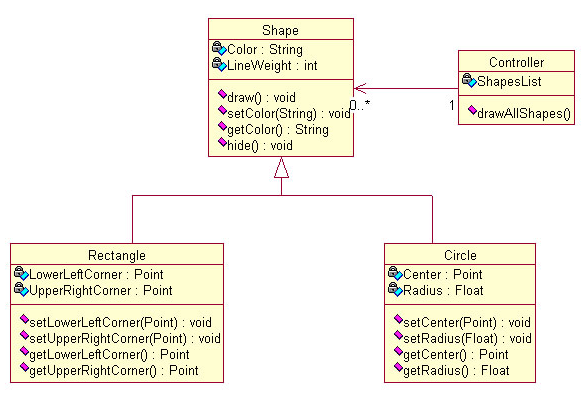


В классе Shape определен метод draw(), отвечающий за отрисовку фигуры. Учитывая, что каждая фигура должна рисовать себя уникальным образом, подклассы (такие как Rectangle и Circle) должны реализовать этот метод по своему усмотрению так, что вызов draw() на объекте Circle приведет к рисованию круга, а вызов draw() на объекте Rectangle - к рисованию прямоугольника.

Объект Controller содержит список фигур ShapesList, в котором могут содержаться как прямоугольники, так и окружности. Реализовать метод отрисовки всех фигур drawAllShapes() можно 2 способами: в процедурном стиле и объектно-ориентированном

In [9]:
# Возможный код drawAllShapes() (процедурный подход)
# Предположим, что в процедурном подходе информация о фигуре
# хранится в словаре с соответствующими ключами и указанием типа, например,
# {'x1': 5, 'y1': 0, 'x2': 3, 'y2': 6, 'type': "Прямоугольник"} для прямоугольника

def drawAllShapes():
    for shape in shapeList:
       if shape["type"] == "Прямоугольник":
           draw_rectangle(shape["x1"], shape["y1"], shape["x2"], shape["y2"])
       elif shape["type"] == "Окружность":
           draw_circle(shape["x"], shape["y"], shape["r"])

       # И так для каждой новой фигуры
       # А еще может быть много операций: масштабирование, пермещение...

In [11]:
# Возможный код drawAllShapes() (объектно-ориентированный подход)

def drawAllShapes():
    for shape in shapeList:
        # shape сам решает как себя отрисовать, в зависимости от
        # своего класса и внутренней реализации
        shape.draw()
        # Появление новой фигуры не поменяет (!) этот код

## Поддержка ООП в python

Python - полностью объектно-ориентированный язык, где любое значение является объектом, т.е. экземпляром конкретного класса. Например, число 5 или строка "python" являются объектами, экземплярами классов int и str соответственно.

Python позволяет не только использовать имеющиеся классы, но и создавать собственные, которые могут использоваться как любые встроенные типы данных. Поддержка классов в Python реализована на основе синтаксиса и семантики языков программирования C++ и Modula-3 (один из потомков языка Паскаль).

Большинство классов содержат в себе (инкапсулируют) не только поля (данные), но и методы. В Python традиционно поля и методы вместе называются атрибутами (членами) класса. Доступ к члену класса можно получить через '.'. Например, класс str хранит строки символов Юникода в виде данных и поддерживает методы, такие как str.count().

Все атрибуты класса являются общедоступными (в терминологии C++, публичными), а все методы виртуальными (переопределяемыми).

Python позволяет создавать собственные классы, обладающие произвольной функциональностью.

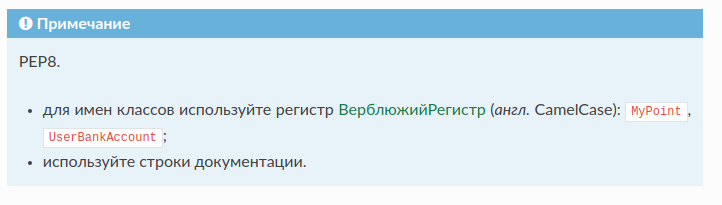

Создание класса начинается с ключевого слова class и указания имени класса. Пример определения в Python простого класса и его использования приведен в Листинге.

In [12]:
class Point2D:
    """Точка на плоскости."""
    pass


if __name__ == "__main__":

    # Создание объекта (экземпляра класса)
    p = Point2D()

    print(p)        # <__main__.Point2D object at 0x0000000001E43898>
    print(type(p))  # <class '__main__.Point2D'>

<class '__main__.Point2D'>


## Иникциализация класса

In [14]:
class Point2D:
    """Точка на плоскости."""

    # Инициализирующий метод (специальный метод с __)
    def __init__(self, x, y):
        self.x = x  # Поля читаются и записываются через 'self'
        self.y = y  # 'self' указывает на текущий экземпляр класса

    # Обычный метод объекта (метод экземпляра класса) имеет те же правила,
    # наименования что и обычные функции
    def distance(self):
        """Вернуть расстояние до центра координат."""
        return (self.x**2 + self.y**2)**0.5


if __name__ == "__main__":

    # Создание объекта (экземпляра класса)
    # Передаем параметры, которые теперь требует '__init__()'
    # Параметр 'self' не передается явно, но содержит ссылку на 'p'
    p = Point2D(3, 4)

    # При выводе объекта на экран по умолчанию отображается имя класса
    print(p)

    # После инициализации доступны атрибуты 'p.x' и 'p.y',
    # где хранятся переданные при создании объекта значения
    print(p.x, p.y)  # 3 4

    # Вызов обычного метода
    print("Расстояние до центра координат: {:.2f}".format(p.distance()))  # 5

3 4
Расстояние до центра координат: 5.00


В Листинге:

- 2 поля x и y;

- метод инициализации \_\_init\_\_();

- метод экземпляра класса distance().

Первым параметром метода идет параметр self, в котором содержится ссылка на экземпляр, который вызвал данный метод.

Еще одним часто используемым специальным методом является специальный метод \_\_str\_\_, возвращающий строковое представление класса

In [15]:
class Point2D:
    """Точка на плоскости."""

    # Инициализирующий метод
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # Строковое представление класса
    def __str__(self):
        """Вернуть строку в виде 'Точка 2D (x, y)'."""
        return "Точка 2D ({}, {})".format(self.x, self.y)

    def distance(self):
        """Вернуть расстояние до центра координат."""
        return (self.x**2 + self.y**2)**0.5


if __name__ == "__main__":
    p = Point2D(3, 4)
    print(p)  # Точка 2D (3, 4)

Точка 2D (3, 4)


Если метод \_\_str\_\_ не реализован, осуществляется вывод строкового представления класса по умолчанию